# Ford GoBike System Data
## by Ahmed Gamal


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. the dataset consists of 183412 rows representing the number of the trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv("201902-fordgobike-tripdata.csv") #importing the dataset 
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info() #investigating the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.shape

(183412, 16)

### What is the structure of your dataset?
the data consisted from 183412 row and 16 columns

### What is/are the main feature(s) of interest in your dataset?
I am intersted to figure out what is the factors which effect the duration of the trip and their number,also I am intrested on the common start and end  staion 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?	
duration_sec
start_time	
end_time	
start_station_name	
end_station_name
member_birth_year	
member_gender	
user_type                

## Cleaning

###### first I will drop the columns which I  won't use 

In [5]:
columns=["start_station_id","start_station_latitude","start_station_longitude","end_station_id","end_station_latitude","end_station_longitude","bike_id","bike_share_for_all_trip"]
df.drop(columns=columns,inplace=True)

In [6]:
df.duplicated().sum() #checking for duplicates 

0

###### I will convert the duration in seconds to duration in minutes to be more readable 

In [7]:
df["duration_sec"]=df["duration_sec"]/60 #convert to min
df.rename(columns={"duration_sec":"duration_min"},inplace=True)#rename the column 
df.head()

,duration_min,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male
1,708.683333,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN
2,1030.900000,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male
3,608.166667,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other
4,26.416667,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male


In [8]:
null_values=df.isnull().sum() #check for null value
null_values

duration_min             0
start_time               0
end_time                 0
start_station_name     197
end_station_name       197
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

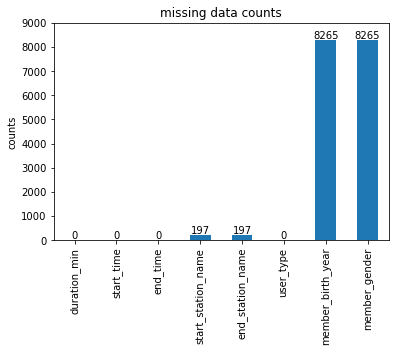

In [9]:
null_values.plot(kind="bar",title="missing data counts");#visualising the null value
plt.xticks(rotation=90);
plt.ylabel("counts");
plt.ylim(0,9000);
for i in range(null_values.shape[0]):  #to write the values above the bars
    counts=null_values[i]
    plt.text(i,counts+400,counts,ha="center",va="top")

###### the nan values of start_station_name and end_station_name are equal and the values of member_birth_year and member_gender are equally as well!

###### that's maybe related that's the nan values sharing the same row(i.e. if there is a nan value in start_station_name that's mean there is a nan in the neighbouring cell in end_station_name and the same apply for both member_birth_year and member_gender)

###### I will investigate that in the next cells.

In [10]:
verify1=df[df.start_station_name.isnull()==True].index==df[df.end_station_name.isnull()==True].index
print(((verify1==True).sum(),(verify1==False).sum()))


(197, 0)


In [11]:
verify2=df[df.member_birth_year.isnull()==True].index==df[df.member_gender.isnull()==True].index
print(((verify2==True).sum(),(verify2==False).sum()))

(8265, 0)


In [12]:
(len(verify1)+len(verify2))/df.shape[0]

0.04613656685494951

###### so I made sure that the nan values of the above variables sharing the same row 
###### hence the number of the whole nan values is 8462 forming around 4.61 % of the  data so I will drop them 

In [13]:
df.dropna(inplace=True) #droping the nan values

In [14]:
df.isnull().sum() #checking the nan values

duration_min          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

###### fixing data type for start_time,end_time 

In [15]:
df["start_time"]=pd.to_datetime(df["start_time"])#convert from string to datetime 
df['end_time'] = pd.to_datetime(df['end_time']) #convert from string to datetime
df['member_birth_year']=df['member_birth_year'].astype('int')#convert from float to intger

In [16]:
df.info()#check for data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_min        174952 non-null  float64       
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   user_type           174952 non-null  object        
 6   member_birth_year   174952 non-null  int32         
 7   member_gender       174952 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(4)
memory usage: 11.3+ MB


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [17]:
def bar_plot(X,Y,title):
    """
    I used this function to avoid repetition of the code for each time I need to use bar plot
    """
    ylabel="count"
    sb.barplot(x=X,y=Y,color=sb.color_palette()[0]);
    plt.title(title);
    return X,Y,title

#### What is the distribution of the user types?

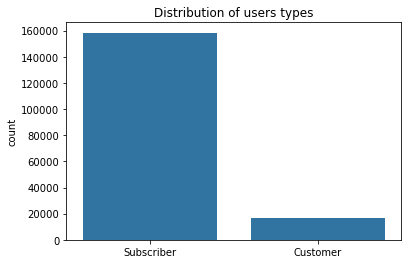

In [18]:
user_type=df["user_type"].value_counts()
bar_plot(user_type.index,user_type.values,"Distribution of users types");
plt.ylabel("count");

In [19]:
user_type[0]/user_type[1]

9.560907883617046

###### most of the users are subscribers, the number of subscribers is more than customers around by nine and half time
>

###### what is the distrbution of genders of  users ?

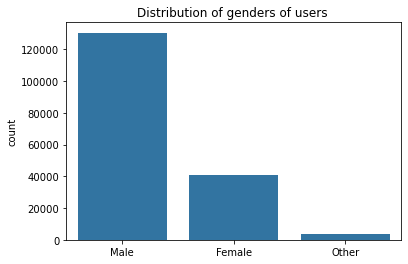

In [20]:
gender_type=df["member_gender"].value_counts()
bar_plot(gender_type.index,gender_type.values,"Distribution of genders of users ");
plt.ylabel("count");

##### the majority of users are males with a minority of undefined gender (other), we will filter them when we will compare between males and females in bivariate and multivariate plots to avoid distraction
>

####  how many users enrolled in bike_share_for_all_trip and how many users didn't?



#### what is the distribution of users ages?
> for this question, we will create a column called "Age" by substracting member_birth_year from 2019 which is the year when this data acquired 

In [21]:
df["Age"]=2019-df["member_birth_year"] #create the age column 

In [22]:
df.Age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: Age, dtype: float64

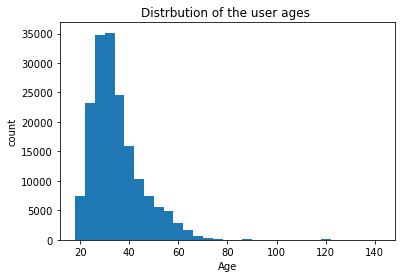

In [23]:
bins1=np.arange(df["Age"].min(),df["Age"].max()+4,4)#to optimize the edge of bins 
plt.hist(df["Age"],bins=bins1);
plt.title("Distrbution of the user ages ");
plt.xlabel("Age");
plt.ylabel("count");

In [24]:
(df["Age"]<80).sum()/len(df["Age"])

0.9988396817412776

###### Nearly 99.9% of the age range fall below 80 years, so we will zoom in values below 80 years 

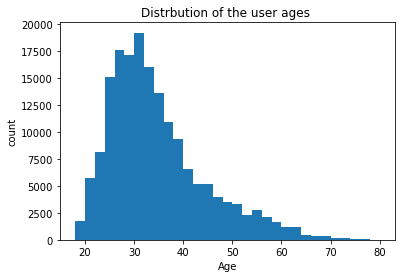

In [25]:
bins2=np.arange(df["Age"].min(),80+1.5,2) #to optimize the edge of bins 
plt.hist(df["Age"],bins=bins2);
plt.title("Distrbution of the user ages ");
plt.xlabel("Age");
plt.ylabel("count");

###### the majority of the age of users range between 20 and 40 
>

#### let's look at the duration of the trips, how many minutes do most trips ranges? and what is the range of the duration of the trips in minutes?

In [26]:
df["duration_min"].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

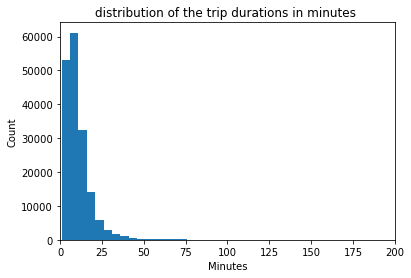

In [27]:
bins=np.arange(1,1409+5,5) #to optimize the edge of bins 
plt.hist(df["duration_min"],bins=bins);
plt.xlim(0,200);
plt.xlabel("Minutes");
plt.ylabel("Count");
plt.title("distribution of the trip durations in minutes ");

In [28]:
len(df[df["duration_min"]<75])/len(df["duration_min"])#checking the precentage of values that under 75

0.9941984087063881

###### since more than 99 % of duration data fall below 75 minutes we will make a histogram with range (1-75)minutes

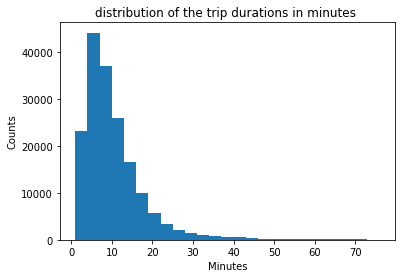

In [29]:
bins=np.arange(1,75+3,3) #to optimize the edge of bins 
plt.hist(df["duration_min"],bins=bins);
plt.xlabel("Minutes");
plt.ylabel("Counts");
plt.title("distribution of the trip durations in minutes ");



######  Most of the duration of the trips ranges between 1-20 minutes  
>

#### What are the most common start and end stations?

In [30]:
print(len(df["start_station_name"].value_counts()),len(df["end_station_name"].value_counts())) #checking the number of stations   


329 329


###### there is 329 station, to make it easier we will take only the first 20 most common stations 

In [31]:
sts_common=df["start_station_name"].value_counts()[:21] # taking the first 20 values
ets_common=df["end_station_name"].value_counts()[:21] # taking the first 20 values

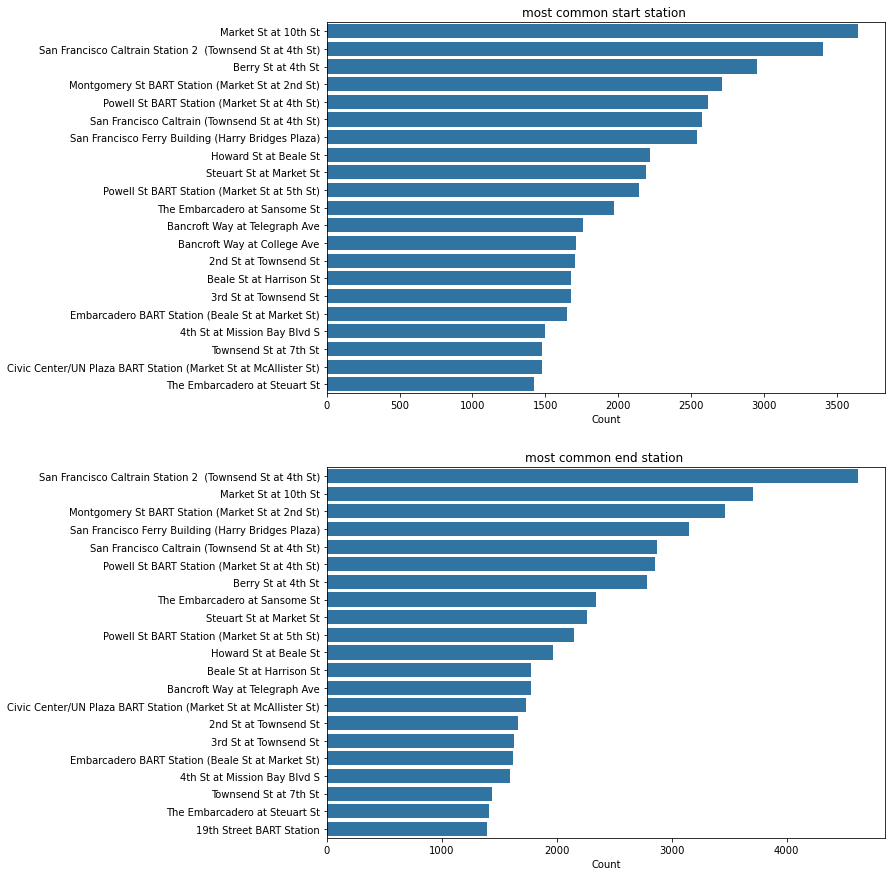

In [32]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
bar_plot(sts_common.values,sts_common.index,"most common start station ");
plt.xlabel("Count");
plt.subplot(2,1,2)
bar_plot(ets_common.values,ets_common.index,"most common end station ");
plt.xlabel("Count");


###### the most common start station is Market St at 10th St followed by Townsend St at 4th St  and  the most common end station is  San Francisco Caltrain Station 2  (Townsend St at 4th St) and followed by the most common start station  that's lead us to think that may  the most common trips are between those two stations, I will investigate that in the next plot
>

#### What is the most common trips ?

###### for that question we will create a column for the trips 

In [33]:
df["Trips"]=df["start_station_name"]+" - "+df["end_station_name"] #creating the trip column

In [34]:
len(df["Trips"].value_counts())#check the total number of trips

23303

###### due to high values of trips we will only concentrate upon the most common 20 trips 

In [35]:
common_trips=df["Trips"].value_counts()[:21]# taking the first 20 values

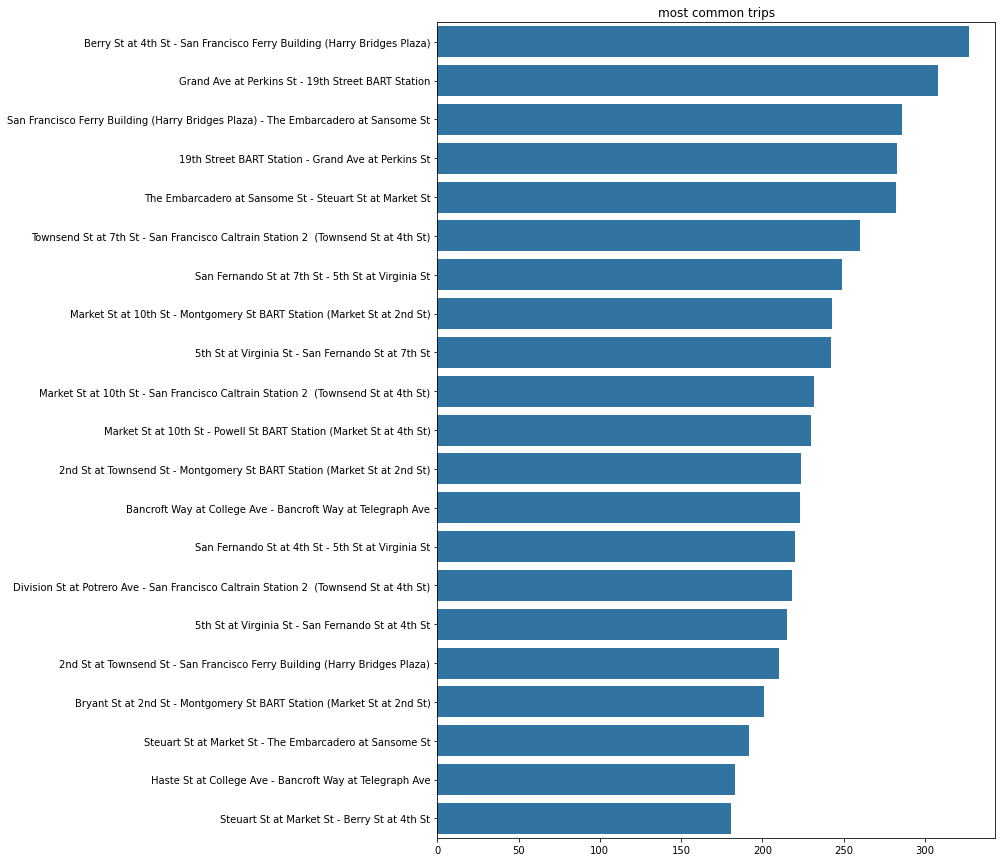

In [36]:
plt.figure(figsize=(10,15))
bar_plot(common_trips.values,common_trips.index,"most common trips");

###### surprisingly ! that the most common trip is not between the most common station and most common end station although of their high counts in the plots above, and the only trip between them comes as the ninth between 20 most common trips with no other trip between them as goings and comings trips!

##### the most common trip is between Berry St at 4th St - San Francisco Ferry Building  

###### What are the most common hours in the day which the trips start?

In [37]:
df["hour"]=df["start_time"].dt.hour #create the hour column 


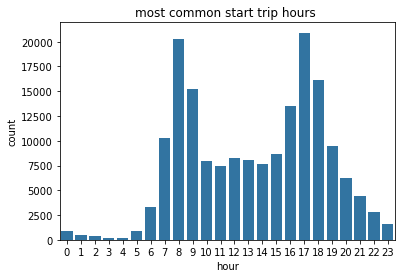

In [38]:
sb.countplot(data=df,x="hour",color=sb.color_palette()[0]);
plt.title("most common start trip hours ");

###### the most common start trip hours are 8:00 and 17:00, and that makes sense since the traditional American business hours are 9:00 a.m. to 5:00 p.m., according to this [article](https://en.wikipedia.org/wiki/Working_time#:~:text=The%20traditional%20American%20business%20hours,comprising%2040%20hours%20in%20total.)  
>

#### what is the number of trips by weekdays?

In [39]:
df["days"]=df["start_time"].dt.day_name()#create the days columns 


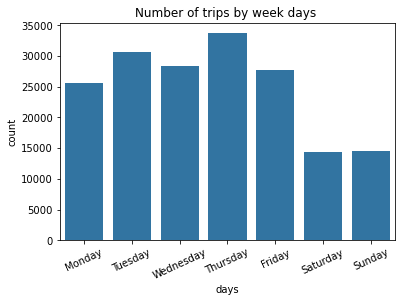

In [40]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df,x="days",color=sb.color_palette()[0],order=order);
plt.title("Number of trips by week days ")
plt.xticks(rotation=25);

###### The largest numbers of trips was recorded Thursday and Tuesday,the lowest numbers of trips was recorded weekends (Saturday, Sunday) days and it's nearly equal

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes, I have tried transformation on count axis on duration, but found out that it will be hard to interpret, so I have used confidence intervales instead with a confidence level of more than 99% and dropped the outliers values(like 140 years  in age or 1409 mins in the duration of the trips)especially that those outliers values are forming less than 1 %


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, There are unusual values in age(like 140years) and duration in minutes(like 1400 and other), so I neglected them by creating confidence intervals with a confidence level of more than 99% to be more interpretable. and I have dropped the columns that I won't use. I changed the type of  start_time and end_time from string to DateTime to extract the hour and day  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### what is the age of users by gender?

###### in this question we will drop "other" to avoid distraction, especially they are forming only 2%

In [41]:
df["member_gender"].value_counts()[-1]/len(df["member_gender"]) #checking the percentage of "other" values 

0.02084571768256436

In [42]:
df2=df.loc[df["member_gender"].isin(["Male","Female"])] # create a new  dataset that didn't contain "other" in gender to avoid distracting 

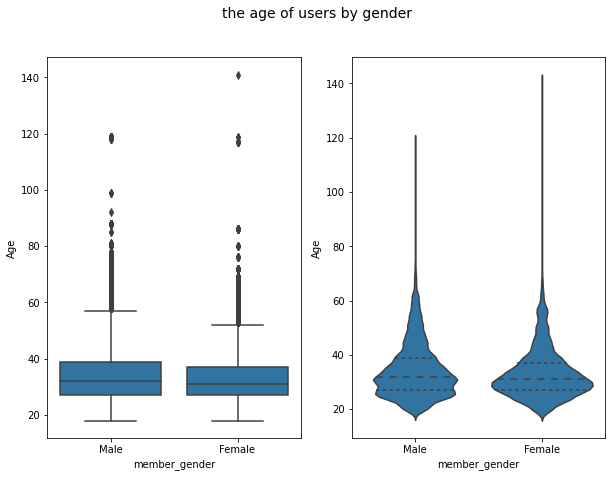

In [43]:
color=sb.color_palette()[0]
fig=plt.figure(figsize=(10,7))
fig.suptitle("the age of users by gender",fontsize=14)
plt.subplot(1,2,1)
sb.boxplot(data=df2,x="member_gender",y="Age",color=color);
plt.subplot(1,2,2)
sb.violinplot(data=df2,x="member_gender",y="Age",color=color,inner="quartile");


###### From the box plot we can see that males are a bit older than Females
###### From the Violin plot we can that,there is a broader range in female age  approximately between 25-35 and that's makes sense  since that male are a bit older than Females
>

#### what is the age of the users by user type?

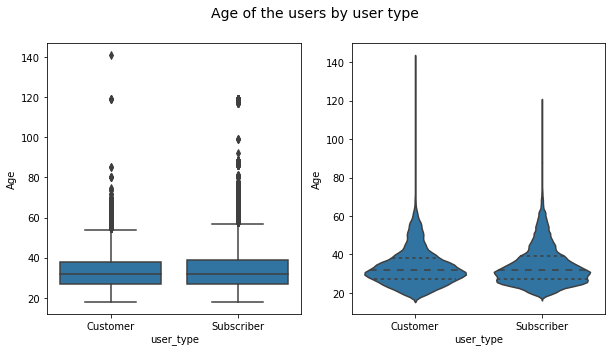

In [44]:
fig=plt.figure(figsize=(10,5))
fig.suptitle("Age of the users by user type ",fontsize=14)
plt.subplot(1,2,1)
sb.boxplot(data=df2,x="user_type",y="Age",color=color);
plt.subplot(1,2,2)
sb.violinplot(data=df2,x="user_type",y="Age",color=color,inner="quartile");


###### It seems there is no difference  between the ages of the customers and subscribers,but the Age of subscribers exceeds the customer age by a very small margin,and that can be explained by the wider range between 25-35 years in customer age than the same range in subscribers age
>

####  what is the number of trips by gender and days of week ? 

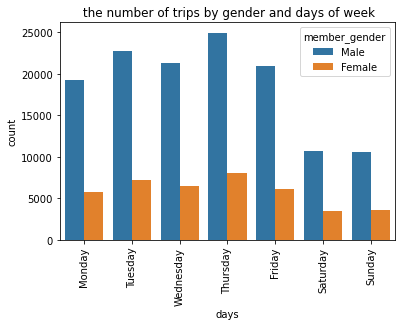

In [45]:
sb.countplot(data=df2,x="days",hue="member_gender",order=order);
plt.title(" the number of trips by gender and days of week")
plt.xticks(rotation=90);

###### Although the number of trips of  males is more than females, there is no actual difference  in the pattern of both gender  than the univariat plot  that depicts the number of trips by weekdays, The largest numbers of trips are on Thursday and Tuesday, the lowest number of trips was recorded on weekends (Saturday, Sunday) days and it's nearly equal

###### is there a relationship between duration in minutes and age?

<Figure size 720x360 with 0 Axes>

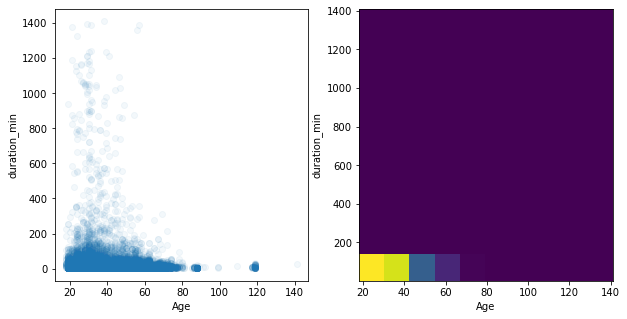

In [46]:
fig=plt.figure(figsize=(10,5));
fig.suptitle("Duration in minutes Vs Age ",fontsize=14);
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
sb.regplot(data=df,x="Age",y="duration_min",scatter_kws={'alpha':1/20},fit_reg=False);
plt.subplot(1,2,2);
plt.hist2d(data=df,x="Age",y="duration_min");
plt.xlabel("Age");
plt.ylabel("duration_min");


###### those  plots is a bit unclear so I will adjust the axes to cover only 99% of the data to reduce or neglect  the effect the outliers 

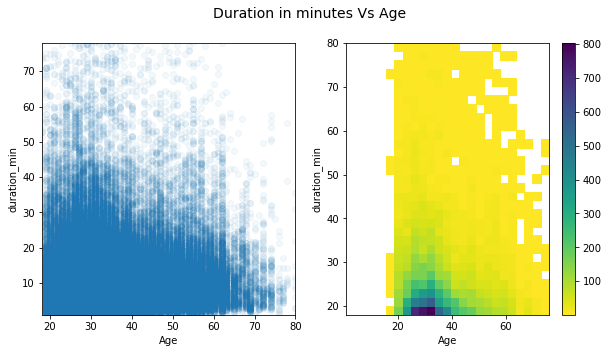

In [47]:
fig=plt.figure(figsize=(10,5))
fig.suptitle("Duration in minutes Vs Age ",fontsize=14)
plt.subplot(1,2,1)
sb.regplot(data=df,x="Age",y="duration_min",scatter_kws={'alpha':1/20},fit_reg=False)
plt.xlim(df["Age"].min(),80)
plt.ylim(1,78)
plt.subplot(1,2,2);
binsage=np.arange(df["Age"].min(),80+1.5,2)
binsmin=np.arange(1,75+3,3)
plt.hist2d(data=df,x="Age",y="duration_min",bins=[binsmin,binsage],cmap='viridis_r',cmin=0.5);
plt.colorbar();
plt.xlabel("Age");
plt.ylabel("duration_min");


###### There is no clear relationship between duration and the age ,but we can see clearly that most  trips durations is between 10 and 20 minutes and the majority of age of users is between 20-40 years, and thats assure the same facts discovered in univirants plots 
>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### let's investigate the relationship between the Average duration in minutes by user type and gender

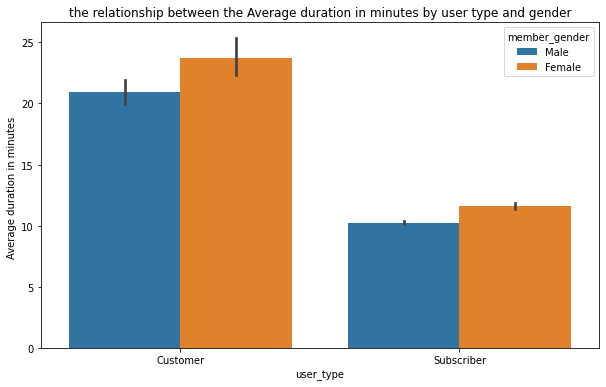

In [48]:
plt.figure(figsize=(10,6));
sb.barplot(data=df2,x="user_type",y="duration_min",hue="member_gender");
plt.ylabel("Average duration in minutes ");
plt.title("the relationship between the Average duration in minutes by user type and gender");

###### The average trip  duration in minutes of customers generally are longer than subscribers, the female trips are longer than male trips on average 
>

 ###### let's investigate the relationships between the number of the trips by weekdays, user type and user gender

#### I will make a Stacked column chart to make it  more interpretable to the audience in the explanatory visual, I prefared that plot on Faceting in Two Directions


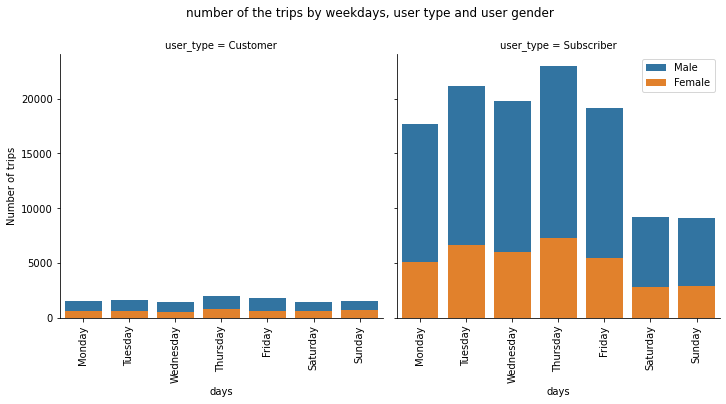

In [49]:
g=sb.FacetGrid(data =df2, col="user_type",hue="member_gender",margin_titles=True,height=5)
g.map(sb.countplot,"days",order=order);
g.set_xticklabels(rotation=90,);
g.set_ylabels("Number of trips");
plt.subplots_adjust(top=0.85)
plt.suptitle("number of the trips by weekdays, user type and user gender") 
plt.legend();

###### Surprisingly, the customer user type (especially the female) doesn't follow the same manner as the Subscribers user type which depicted in the previous univariate and bivariate plots which depicted the counts of trips against the day week which illustrated the lowest number of trips recorded on weekends (Saturday, Sunday) days and it's nearly equal.

###### but in both user types Thursday have the highest number of trips which is consistent with the previous plots 
>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>the pattern of subscribers user type in the second plot  is consistent(on the contrary of customer type) with the univariate and bivariate plots which depicted the counts of trips against the day week, and that makes sense since the facts discovered in univariate plots illustrate that the number of subscribers is more than customer type by 9.5 times, so It's very logical that the pattern of numbers of the trips of subscriber user type will dominate Its pattern upon the same plots in univariate and bivariate which depicts the relationship between the number of trips by weekdays but without the user_type variable and obscure  the pattern of the customer type ,but when I have introduced this variable I found out that the pattern of customer type was different from the subscriber type


### Were there any interesting or surprising interactions between features?

> Yes,the inetraction between the number of the trips by weekdays, user type and user gender,that the customer user doesn't follow the same manner as the Subscribers user type which depicted in the previous univariate